# Text Classification with RNNs

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Reading data

In [3]:
labels = []
docs = []
with open('/content/drive/MyDrive/hamshahri-for-classification.txt','r') as file:
  for line in file:
    line = line.rstrip()
    result = line.split('@@@@@@@@@@')
    labels.append(result[0])
    docs.append(result[1])

In [4]:
int_label = []
for label in labels:
  if 'اجتماعی' in label:
    int_label.append(0)
  if 'ادب' in label:
    int_label.append(1)
  if 'اقتصاد' in label:
    int_label.append(2)
  if 'ورزش' in label:
    int_label.append(3)

In [5]:
def clean(data):
  tokens = data.split()
  translation_table = str.maketrans('', '', "\"#$%&'()*+,-/:;<=>?@[\]^_`{|}~،؟!❊#$٪^&*)(ـ+=-؛:❊{}.")
  tokens = [w.translate(translation_table) for w in tokens]
  return ' '.join(tokens)

In [6]:
docs = [clean(doc) for doc in docs]
labels = int_label
num_classes = 4

In [7]:
import numpy as np
from tensorflow.keras.utils import to_categorical

labels = to_categorical(labels,num_classes = num_classes)

In [8]:
labels[0]

array([1., 0., 0., 0.], dtype=float32)

## Train the model

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(docs,labels,test_size = 0.2,random_state=1000)
X_test,X_val,Y_test,Y_val = train_test_split(X_test, Y_test ,test_size = 0.5,random_state = 10000)

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(docs)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
X_val = tokenizer.texts_to_sequences(X_val)

In [11]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

80142


In [12]:
from keras.preprocessing.sequence import pad_sequences
maxlen = 100
X_train = pad_sequences(X_train, padding = 'post', maxlen=100)
X_test = pad_sequences(X_test, padding = 'post', maxlen=100)
X_val = pad_sequences(X_val, padding = 'post', maxlen=100)

![](https://doc-00-5g-docs.googleusercontent.com/docs/securesc/e04elm2ufc7fh57280o6p12sgt2ma7f7/cbugq1dsecispsceu06a03mofqplst2q/1658486250000/14961254794536018283/12056060788794650457/1xmof9WLKZKlrcwwAQi81hMTX1G7J26v-?e=view&ax=ACxEAsZYQ8YXpIE1IK_FexHWS7XiWwQCjmiqTzn0QU66RUFFuwhcx3X74UGpdR4REteCqzLVIEfSxWuUfcoC1BP-GoWXw_h6XmfhdjDXOu7LxxOAZkCTzG8FhJUvPAsrfaPI5poXDgy9T2zbsvK0vKjsvAOv6RsvUH7ygTkWzcM-LaDe59-t0QEK8NAWCeEkR-JJkQAyeE66dcmGAwkh1-pxA4gYhd8gYWi8k9-141-Kbc277oDyn6UFRsrbMRUvUxucPIerKXv_9wAW0wS85WskfSbHYumXuJU6qwSbrgQetROqY5yHEEHNTW51d_ryKgUJb48n222yd3886tfKFbOQaEu9vgkgYWvHyboQ1LtHf04Z019LdbgwphOCKeNNsJPt3c6JTS8rgDUbtAru4d30x5oGzDk2n_gCuaVIVGlsUR07BmswiLVy91bWQctvaM4tncWtdugxLLFERl6Ke3SX-DAEXt2IAr8xT30Mja5oNPwvLmT2UtmDxJGUgeb-xvtYQFAFRkPXGtgSUimgTbmPdAIeD0BPLrTvNwY7_WwOXxStoRKKTyl3nxWcOl9RaElBJrw8AiDfihtSnH-Jxal1J8RKF3J4w4psOTRIisiXwWpkuyHIjQ9P6VWLdDy3-3Mc-3H9KFmNkEq6cmQokEon1e_6IlFlj01ZutISukR0gFWaiMHHfYfTYLiFOLV8wPGiiAu-HPtNfa8DJZSBzHH3tmm3HDM1IBHghiVOGyi47xo0enWTnhXdsw&uuid=c38a0451-e309-4a55-9e73-f1edb82fcdae&authuser=0&nonce=n6810lq30fo14&user=12056060788794650457&hash=kdp3b0rs9so6j92ppgdhcst04688ql3m)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Bidirectional, LSTM, GRU, Embedding

embedding_dim = 100
model = Sequential()
# Trainable = True -> in train process embedding also gets train
model.add(Embedding(input_dim = vocab_size,
                    output_dim = embedding_dim,
                    input_length = maxlen,
                    trainable = True))
# first arg -> size h(t) for each word
# third arg -> do we want to return all h(t) or only the last h(t)
# if return_sequence = True we want to return all h(t)
model.add(Bidirectional(GRU(300,dropout=0.2,return_sequences = True)))
model.add(Bidirectional(GRU(200, dropout=0.2,  return_sequences=True)))
model.add(Bidirectional(GRU(100, dropout=0.2,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          8014200   
                                                                 
 bidirectional (Bidirectiona  (None, 100, 600)         723600    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 100, 400)         962400    
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 200)              301200    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 100)               20100     
                                                        

In [14]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_path = '/content/drive/MyDrive/model-{epoch:03d}-{val_accuracy:03f}.ckpt'

cp_callback = ModelCheckpoint(
    filepath=checkpoint_path, 
    monitor = 'val_accuracy',
    mode = 'max',
    save_best_only=True)

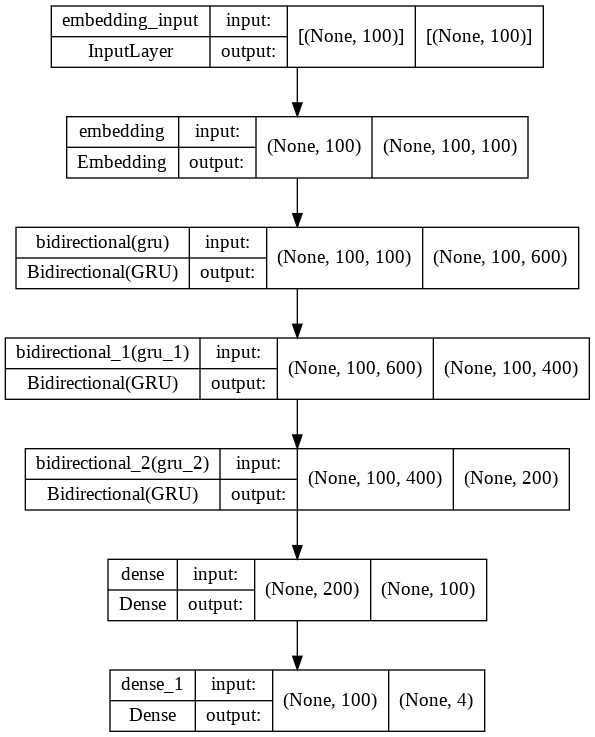

In [15]:
import tensorflow as tf

tf.keras.utils.plot_model(model, to_file='/content/drive/MyDrive/model.png', show_shapes=True)

In [16]:
history = model.fit(X_train, Y_train,
                    epochs=20,
                    validation_data=(X_val, Y_val),
                    batch_size=100,
                    callbacks=[cp_callback])

Epoch 1/20
80/80 [==============================] - ETA: 0s - loss: 0.8184 - accuracy: 0.6445

INFO:tensorflow:Assets written to: /content/drive/MyDrive/model-001-0.680000.ckpt/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/model-001-0.680000.ckpt/assets


80/80 [==============================] - 49s 477ms/step - loss: 0.8184 - accuracy: 0.6445 - val_loss: 0.7330 - val_accuracy: 0.6800
Epoch 2/20
80/80 [==============================] - ETA: 0s - loss: 0.4322 - accuracy: 0.8361

INFO:tensorflow:Assets written to: /content/drive/MyDrive/model-002-0.846000.ckpt/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/model-002-0.846000.ckpt/assets


80/80 [==============================] - 36s 449ms/step - loss: 0.4322 - accuracy: 0.8361 - val_loss: 0.4225 - val_accuracy: 0.8460
Epoch 3/20
80/80 [==============================] - ETA: 0s - loss: 0.2163 - accuracy: 0.9274

INFO:tensorflow:Assets written to: /content/drive/MyDrive/model-003-0.847000.ckpt/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/model-003-0.847000.ckpt/assets


80/80 [==============================] - 35s 444ms/step - loss: 0.2163 - accuracy: 0.9274 - val_loss: 0.4524 - val_accuracy: 0.8470
Epoch 4/20
80/80 [==============================] - ETA: 0s - loss: 0.1073 - accuracy: 0.9641

INFO:tensorflow:Assets written to: /content/drive/MyDrive/model-004-0.853000.ckpt/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/model-004-0.853000.ckpt/assets


80/80 [==============================] - 36s 452ms/step - loss: 0.1073 - accuracy: 0.9641 - val_loss: 0.4952 - val_accuracy: 0.8530
Epoch 5/20
80/80 [==============================] - 7s 91ms/step - loss: 0.0613 - accuracy: 0.9799 - val_loss: 0.6041 - val_accuracy: 0.8370
Epoch 6/20
80/80 [==============================] - ETA: 0s - loss: 0.0351 - accuracy: 0.9885

INFO:tensorflow:Assets written to: /content/drive/MyDrive/model-006-0.861000.ckpt/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/model-006-0.861000.ckpt/assets


80/80 [==============================] - 35s 447ms/step - loss: 0.0351 - accuracy: 0.9885 - val_loss: 0.5901 - val_accuracy: 0.8610
Epoch 7/20
80/80 [==============================] - 7s 93ms/step - loss: 0.0242 - accuracy: 0.9930 - val_loss: 0.6620 - val_accuracy: 0.8600
Epoch 8/20
80/80 [==============================] - ETA: 0s - loss: 0.0138 - accuracy: 0.9962

INFO:tensorflow:Assets written to: /content/drive/MyDrive/model-008-0.864000.ckpt/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/model-008-0.864000.ckpt/assets


80/80 [==============================] - 36s 458ms/step - loss: 0.0138 - accuracy: 0.9962 - val_loss: 0.7035 - val_accuracy: 0.8640
Epoch 9/20
80/80 [==============================] - 8s 94ms/step - loss: 0.0074 - accuracy: 0.9981 - val_loss: 0.7965 - val_accuracy: 0.8510
Epoch 10/20
80/80 [==============================] - 8s 95ms/step - loss: 0.0222 - accuracy: 0.9933 - val_loss: 0.8338 - val_accuracy: 0.8320
Epoch 11/20
80/80 [==============================] - 8s 99ms/step - loss: 0.0189 - accuracy: 0.9929 - val_loss: 0.7902 - val_accuracy: 0.8580
Epoch 12/20
80/80 [==============================] - 8s 95ms/step - loss: 0.0095 - accuracy: 0.9973 - val_loss: 0.8905 - val_accuracy: 0.8530
Epoch 13/20
80/80 [==============================] - 7s 94ms/step - loss: 0.0052 - accuracy: 0.9977 - val_loss: 0.9489 - val_accuracy: 0.8470
Epoch 14/20
80/80 [==============================] - 7s 93ms/step - loss: 0.0121 - accuracy: 0.9960 - val_loss: 0.8965 - val_accuracy: 0.8400
Epoch 15/20
80/80

In [17]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

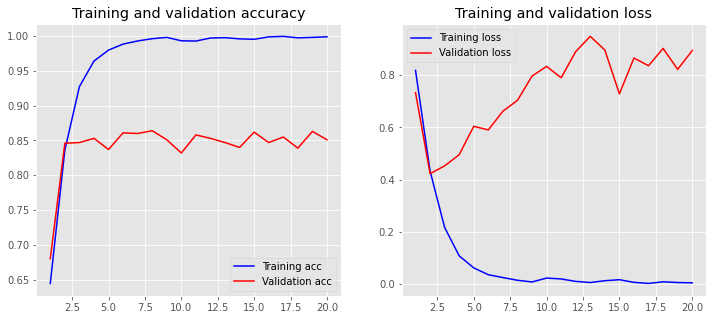

In [18]:
plot_history(history)

In [20]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/model-008-0.864000.ckpt')

In [21]:
preds = model.evaluate(X_test, Y_test, verbose=0)
print(preds)

[0.8016781806945801, 0.8460000157356262]
